<a href="https://colab.research.google.com/github/AniruddhSrivatsa/Hackathons/blob/master/Dim_reduce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df=pd.read_csv("ionosphere_data_kaggle.csv")
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [ ]:
df.dtypes

feature1       int64
feature2       int64
feature3     float64
feature4     float64
feature5     float64
feature6     float64
feature7     float64
feature8     float64
feature9     float64
feature10    float64
feature11    float64
feature12    float64
feature13    float64
feature14    float64
feature15    float64
feature16    float64
feature17    float64
feature18    float64
feature19    float64
feature20    float64
feature21    float64
feature22    float64
feature23    float64
feature24    float64
feature25    float64
feature26    float64
feature27    float64
feature28    float64
feature29    float64
feature30    float64
feature31    float64
feature32    float64
feature33    float64
feature34    float64
label         object
dtype: object

In [ ]:
df.isna().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [ ]:
df["label"].unique()

array(['g', 'b'], dtype=object)

In [ ]:
df["label"]=df["label"].map({"g":0,"b":1})
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,0
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,1
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,0
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,1
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,0


In [ ]:
df["feature2"].unique()

array([0])

In [ ]:
df_lab=df["label"]

Feature 2 does not have any use in prediction as it has only one value ie 0 and we drop the label column to perform various dimensionality reductions

In [ ]:
df.drop(["feature2","label"],axis=1,inplace=True)

In [ ]:
df1=df.copy()

In [ ]:
df2=df.copy()

In [ ]:
df3=df.copy()

In [ ]:
df1.shape

(351, 33)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel=VarianceThreshold(threshold=0.3)
sel.fit(df1)
mask=sel.get_support()
print(mask,"\n",sum(mask),"out of",len(mask))

[False False False False False False False False False  True False  True
 False  True False  True False  True False  True False  True False  True
 False False  True  True False  True False False False] 
 11 out of 33


In [ ]:
df4=df1.loc[:,mask]

In [ ]:
df4.head()

,feature11,feature13,feature15,feature17,feature19,feature21,feature23,feature25,feature28,feature29,feature31
0,0.85243,0.59755,0.60536,0.84356,0.58212,0.56971,0.36946,0.56811,-0.46168,0.21266,0.42267
1,0.50874,0.34432,-0.51685,0.05499,0.33109,-0.13151,-0.18056,-0.20332,-0.18401,-0.19040,-0.16626
2,0.73082,0.85443,0.54591,0.83775,0.75535,0.70887,0.43385,0.57528,-0.22145,0.43100,0.60436
3,0.00000,0.00000,-1.00000,0.54094,-1.00000,-0.69975,0.00000,1.00000,1.00000,1.00000,0.25682
4,0.52798,0.56409,0.34395,0.52940,0.45107,0.05982,0.02309,0.03286,-0.53206,0.02431,-0.05707


In [ ]:
df4.corr()

,feature11,feature13,feature15,feature17,feature19,feature21,feature23,feature25,feature28,feature29,feature31
feature11,1.000000,0.619217,0.664243,0.748290,0.590598,0.518041,0.561689,0.365821,0.197369,0.396851,0.294646
feature13,0.619217,1.000000,0.825558,0.676705,0.570487,0.688184,0.530798,0.364645,0.146800,0.277995,0.355473
feature15,0.664243,0.825558,1.000000,0.699406,0.669878,0.741152,0.588450,0.456812,0.164177,0.355917,0.445175
feature17,0.748290,0.676705,0.699406,1.000000,0.684800,0.659814,0.576916,0.554071,0.168507,0.404276,0.358692
feature19,0.590598,0.570487,0.669878,0.684800,1.000000,0.659809,0.556622,0.549837,0.205673,0.473187,0.418580
feature21,0.518041,0.688184,0.741152,0.659814,0.659809,1.000000,0.631976,0.553704,0.073413,0.479619,0.511278
feature23,0.561689,0.530798,0.588450,0.576916,0.556622,0.631976,1.000000,0.533583,0.207700,0.540443,0.538973
feature25,0.365821,0.364645,0.456812,0.554071,0.549837,0.553704,0.533583,1.000000,0.176257,0.650908,0.516121
feature28,0.197369,0.146800,0.164177,0.168507,0.205673,0.073413,0.207700,0.176257,1.000000,0.042002,-0.008136
feature29,0.396851,0.277995,0.355917,0.404276,0.473187,0.479619,0.540443,0.650908,0.042002,1.000000,0.553855


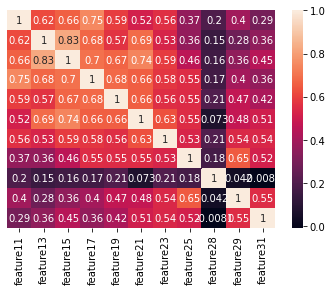

In [ ]:
sns.heatmap(df4.corr(),yticklabels=False,annot=True)

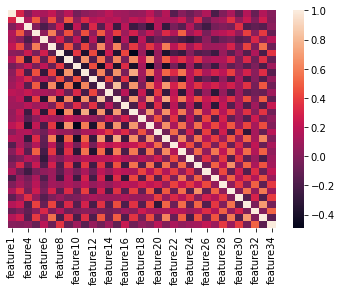

In [ ]:
sns.heatmap(df1.corr(),yticklabels=False)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df1,df_lab,test_size=0.2,stratify=df_lab,random_state=42)

In [ ]:
print(X_train.shape,X_test.shape)

(280, 33) (71, 33)


We will fit Logistic regression directly to df1 dataframe to check the results before principal component analysis

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
print(accuracy_score(y_test,lr.predict(X_test)))

0.9154929577464789


In [ ]:
lr.coef_

array([[-2.40369497, -1.79106961, -0.79570879, -1.50723126, -1.33863799,
        -0.55385081, -1.00210654, -0.67748169, -0.30744174,  0.6932365 ,
         0.35319889,  0.16840465, -0.79616346, -0.56276341,  0.044004  ,
        -0.29277073, -0.25008824,  0.39470103,  0.0452778 ,  0.01146152,
         1.72577085, -0.74502012, -0.55769452, -0.73628144, -0.67572945,
         1.60441664,  0.05113002, -0.25292308, -0.66203581, -0.46995637,
         0.31814881,  0.21523392,  0.99923275]])

Here we will use the variance threshold mask and fit it to logistic regression

In [ ]:
X1_train,X1_test,y1_train,y1_test=train_test_split(df4,df_lab,test_size=0.2,stratify=df_lab,random_state=42)
lr1=LogisticRegression()
lr1.fit(X1_train,y1_train)
print(accuracy_score(y1_test,lr1.predict(X1_test)))

0.7464788732394366


Removing low variance features reduces the accuracy of our model

Now lets compare the coefficients in logistic regression which was fitted to the df1 dataframe



In [ ]:
maskkk=abs(lr.coef_[0,:])>0.78
print(maskkk)
print(sum(maskkk), "no of coeff above 0.30 out of",len(maskkk))

[ True  True  True  True  True False  True False False False False False
  True False False False False False False False  True False False False
 False  True False False False False False False  True]
10 no of coeff above 0.30 out of 33


In [ ]:
df_lr=df1.loc[:,maskkk]
df_lr.head()

,feature1,feature3,feature4,feature5,feature6,feature8,feature14,feature22,feature27,feature34
0,1,0.99539,-0.05889,0.85243,0.02306,-0.37708,-0.44945,-0.29674,0.41078,-0.45300
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.93597,-0.69707,-0.45300,-0.20468,-0.02447
2,1,1.00000,-0.03365,1.00000,0.00485,-0.12062,0.00827,-0.27502,0.58984,-0.38238
3,1,1.00000,-0.45161,1.00000,1.00000,-1.00000,0.00000,1.00000,0.51613,1.00000
4,1,1.00000,-0.02401,0.94140,0.06531,-0.23255,-0.00712,-0.35575,0.13290,-0.65697


In [ ]:
ranks=sorted(abs(lr.coef_[0,:]))
ranks[-10:]

[0.7957087878442861,
 0.796163464488601,
 0.999232751595421,
 1.0021065449838786,
 1.3386379884144763,
 1.5072312574465627,
 1.604416639782028,
 1.7257708524190298,
 1.7910696071066834,
 2.4036949714045863]

Lets try to reduce the dimensions and increase the accuracy in a different way 

Here we will use the mask obtained from the coefficient comparisons of logistic regression

In [ ]:
X2_train,X2_test,y2_train,y2_test=train_test_split(df_lr,df_lab,test_size=0.2,stratify=df_lab,random_state=42)
lr2=LogisticRegression()
lr2.fit(X2_train,y2_train)
print(accuracy_score(y2_test,lr2.predict(X2_test)))

0.8732394366197183


In [ ]:
X3_train,X3_test,y3_train,y3_test=train_test_split(df1,df_lab,test_size=0.2,stratify=df_lab,random_state=42)
lr3=LogisticRegression()


Now lets use the method of recursive feature elimination

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe=Pipeline([("rfe",RFE(estimator=LogisticRegression(),n_features_to_select=8,verbose=2)),("lr",lr3)])

In [ ]:
pipe.fit(X3_train,y3_train)
print(accuracy_score(y3_test,pipe.predict(X3_test)))

Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
0.9295774647887324


The accuracy has improved

In [ ]:
arr=df1.columns[pipe.steps[0][1].support_]
arr

Index(['feature1', 'feature3', 'feature5', 'feature7', 'feature8', 'feature22',
       'feature27', 'feature34'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df2=sc.fit_transform(df2)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=15)
data=pca.fit_transform(df2)
dgp=pd.DataFrame(data=data)
print(dgp.head())
pca.explained_variance_ratio_.cumsum()


          0         1         2         3         4         5         6  \
0 -1.668242 -2.054597  0.064908 -1.712482  0.009364 -0.479606  0.730332   
1  0.823940 -2.583636 -1.975118 -1.392990 -0.383751 -0.763313  1.535862   
2 -2.034095 -0.748245  0.837354 -1.108202  0.120072 -0.062519  0.220461   
3  1.252374  1.363326 -0.740357  2.670223 -1.934133 -1.241942 -0.164094   
4  0.017756 -1.845357  0.343250 -2.716045 -0.298941 -0.297013  0.590563   

          7         8         9        10        11        12        13  \
0 -0.110340 -0.718496 -0.874031  0.305349 -0.124247 -0.012423  0.773063   
1 -0.306477 -0.489140 -3.214970 -0.521503 -0.121955 -0.069850  0.576720   
2 -0.100407 -0.354253 -0.322654  0.325389 -0.088772 -0.255838  0.142843   
3  0.526752  0.775621 -3.025268 -1.742319  0.057448  1.484673  1.325540   
4  0.370771 -1.042176 -1.197267  0.242574  0.225672 -0.486060  0.480043   

         14  
0 -0.325507  
1 -1.022017  
2 -0.104243  
3  0.219745  
4 -0.174632  


array([0.26703461, 0.39547839, 0.47778896, 0.55016916, 0.60926464,
       0.6447017 , 0.67853738, 0.70913769, 0.73715222, 0.76238353,
       0.78578031, 0.80731997, 0.82578087, 0.84284642, 0.85890276])

In [ ]:
like=pd.concat([dgp,df_lab],axis=1)

In [ ]:
like.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,label
0,-1.668242,-2.054597,0.064908,-1.712482,0.009364,-0.479606,0.730332,-0.110340,-0.718496,-0.874031,0.305349,-0.124247,-0.012423,0.773063,-0.325507,0
1,0.823940,-2.583636,-1.975118,-1.392990,-0.383751,-0.763313,1.535862,-0.306477,-0.489140,-3.214970,-0.521503,-0.121955,-0.069850,0.576720,-1.022017,1
2,-2.034095,-0.748245,0.837354,-1.108202,0.120072,-0.062519,0.220461,-0.100407,-0.354253,-0.322654,0.325389,-0.088772,-0.255838,0.142843,-0.104243,0
3,1.252374,1.363326,-0.740357,2.670223,-1.934133,-1.241942,-0.164094,0.526752,0.775621,-3.025268,-1.742319,0.057448,1.484673,1.325540,0.219745,1
4,0.017756,-1.845357,0.343250,-2.716045,-0.298941,-0.297013,0.590563,0.370771,-1.042176,-1.197267,0.242574,0.225672,-0.486060,0.480043,-0.174632,0


We will see the visualization of pca which is fitted and transformed to the data frame df2

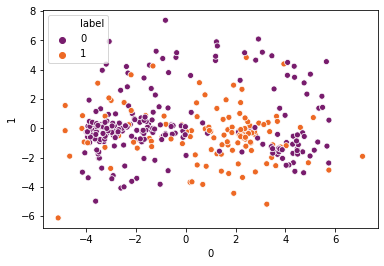

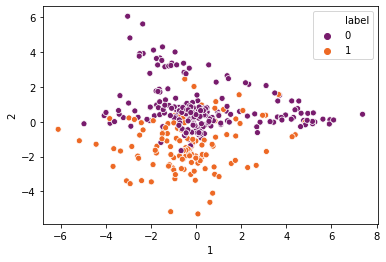

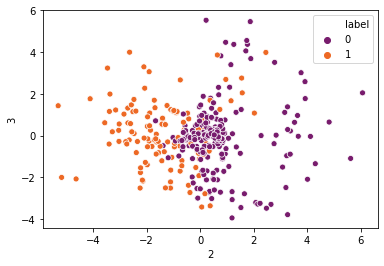

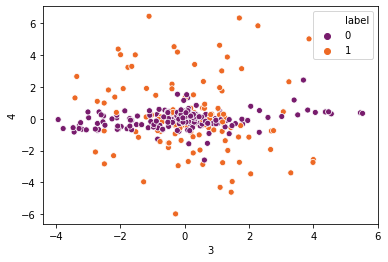

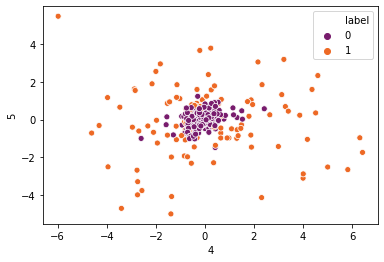

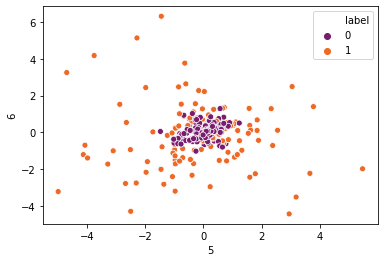

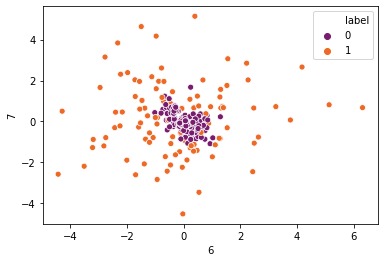

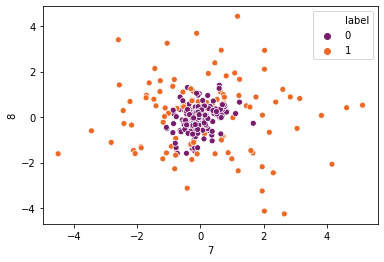

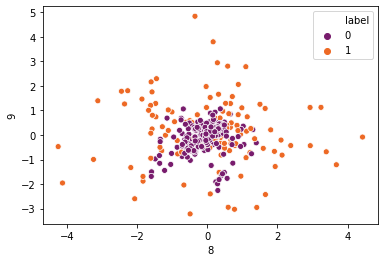

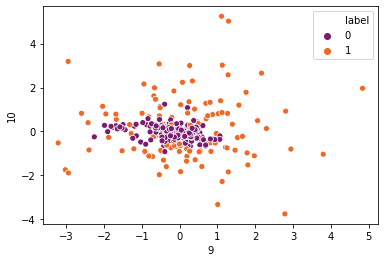

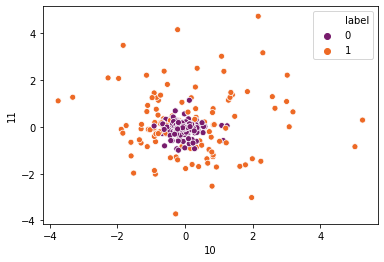

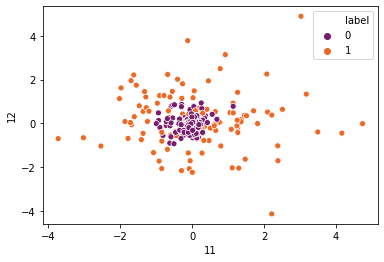

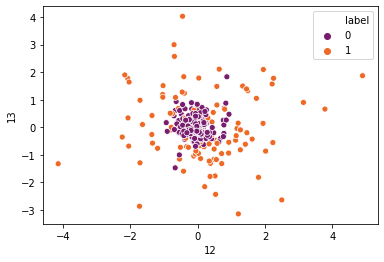

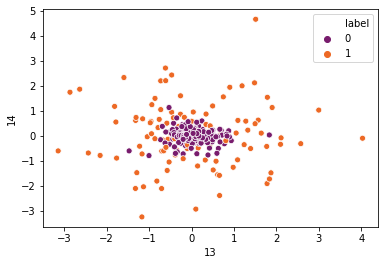

In [ ]:
for i in range(0,14):
  sns.scatterplot(like[i],like[i+1],palette="inferno",hue="label",data=like)
  plt.show()


Now we will see TSNE visualizations

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
df3.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697


In [ ]:
tsne=TSNE(learning_rate=50)
tsnes=tsne.fit_transform(df3)

TSNE converts data in any dimensions to 2 dimensions and used predominantly for visualizations

In [ ]:
df3["x"]=tsnes[:,0]
df3["y"]=tsnes[:,1]

df3.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,x,y
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,-9.338277,9.117192
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,-2.089947,-3.777616
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,-4.079863,6.940599
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,6.247807,-3.241609
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,-9.921218,8.009816


In [ ]:
df3=pd.concat([df3,df_lab],axis=1)
df3.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,x,y,label
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,-9.338277,9.117192,0
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,-2.089947,-3.777616,1
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,-4.079863,6.940599,0
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,6.247807,-3.241609,1
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,-9.921218,8.009816,0


In [ ]:
tsnes[:20]

array([[ -9.338277 ,   9.117192 ],
       [ -2.0899472,  -3.777616 ],
       [ -4.079863 ,   6.940599 ],
       [  6.2478065,  -3.2416086],
       [ -9.921218 ,   8.009816 ],
       [  1.6676896,  -7.767005 ],
       [-10.372162 ,   9.095965 ],
       [  6.0031004,  -4.1874266],
       [ -9.723101 ,  10.535293 ],
       [  2.704702 ,  -7.508657 ],
       [-10.304752 ,  10.290119 ],
       [ -6.8435106,  14.63806  ],
       [ -8.936353 ,  11.497085 ],
       [ -4.1029735,  16.879234 ],
       [  2.045039 ,  13.685817 ],
       [ -2.2507339,  -3.503096 ],
       [  1.3201249,  11.332327 ],
       [  2.8317509,  -5.695342 ],
       [  1.0308663,   2.6330457],
       [  6.1371675,  -0.8074198]], dtype=float32)

Lets visualize the tsne parameters in scatter plots

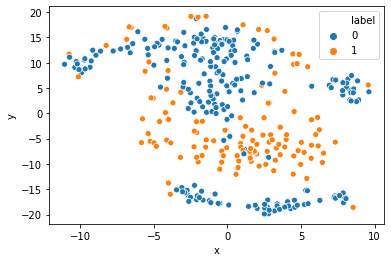

In [ ]:
sns.scatterplot(x=df3["x"],y=df3["y"],data=df3,hue="label")
plt.show()


We see that the data is spread around the origin in both pca and tsne